In [2]:
#%matplotlib widget
%matplotlib inline
import scipy
import matplotlib.pyplot as plt
import uproot
import awkward as ak
from scipy.fft import fft, fftfreq
import numpy as np

In [4]:
def read_data(fname):
    with uproot.open(fname) as f:
        tree = f['t1']
        data = 0
        mean_ch4 = 0
        data = tree["Ch4"].array()
        mean_ch4 = f['mean'].values()[1]
    return data, mean_ch4

ifilename = "sphe_waveforms_Ch4.root"

data, mean_ch4 = read_data(ifilename)
mask = data['selection'] == 1
data = data[mask]
wvfs = data['wvf']

<Array [[-4.72, 1.28, -1.72, ..., 5.28, 8.28], ...] type='3717 * var * float64'>

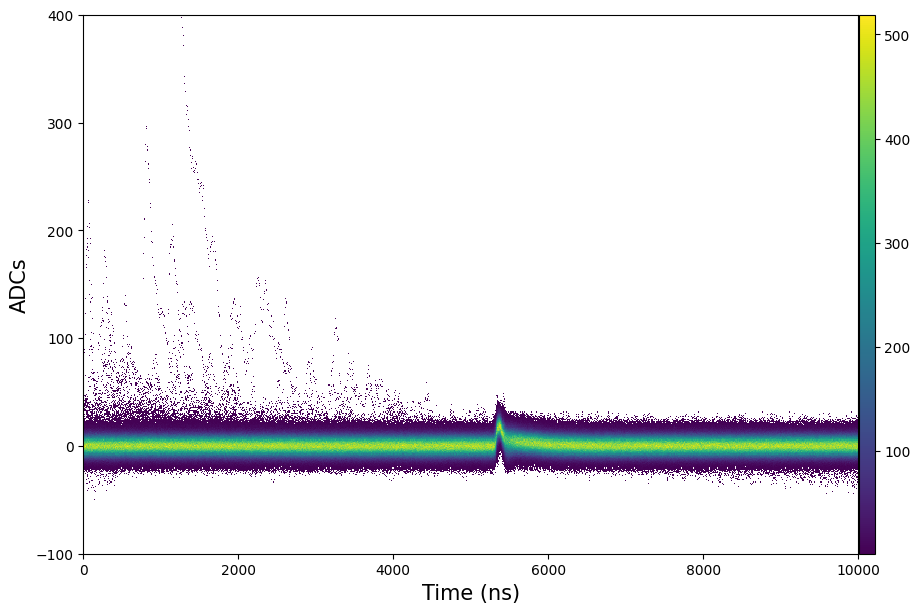

In [7]:
time = np.arange(0,len(wvfs[0])*4,4)
time_arrays = np.tile(time, (len(wvfs), 1))

wvfs = ak.to_numpy(wvfs)

H, yedges, xedges = np.histogram2d(wvfs.flatten(), time_arrays.flatten(), bins=(500,1250), range = [[-100,400],[0,10000]])
H[H==0] = np.nan
fig, ax = plt.subplots(1, 1, figsize=(10,7))

X, Y = np.meshgrid(xedges, yedges)
pcm = ax.pcolormesh(X, Y, H)
ax.set_ylabel("ADCs", fontsize=15)
ax.set_xlabel("Time (ns)", fontsize=15)
cax = ax.inset_axes([1.001, 0., 0.02, 1.])
plt.colorbar(pcm, ax=ax, cax=cax)
# plt.xlim(2000,4000)

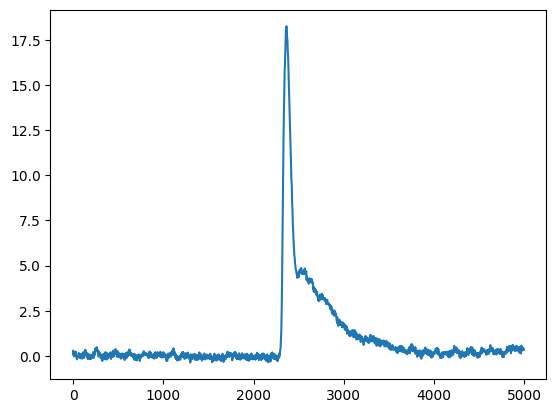

In [4]:
plt.plot(time,mean_ch4)

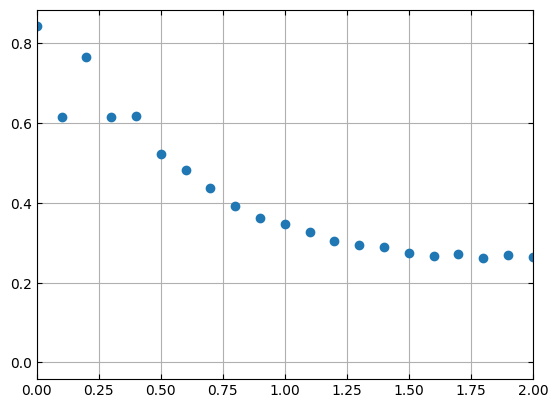

In [12]:
def plot_fft(wf, **kw):
    N = len(wf)
    T = 4e-9
    yf = fft(wf)
    xf = fftfreq(N, T)[:N//2]/1e6
    # print(scipy.signal.find_peaks(yf, distance=10))
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), 'o',**kw)
    plt.grid(True)
    plt.tick_params(top=True, right=True, direction="in")
    plt.tick_params(which="minor", right=True, direction="in")
    plt.xlim(0,2)

plot_fft(mean_ch4)
#plt.gca().set_yscale('log')
#plt.gca().set_xscale('log')
